# Explore the network files

The goal is to learn networkx functions by exploring the stored network files. Each section of the notebook has a task to complete.

This notebook was originally designed for an old verison of networkx (1.9.1). Function names may have changed.

## List the network files
The Python `glob` module can be used to find all network input files that match a filename pattern that includes wildcards.  Use `glob` to obtain all of the filenames in `../data` without hard-coding `network1.txt`, `network2.txt`, etc.  Print the list of filenames.

In [1]:
import networkx as nx
import os, glob

# The networkx API changes in different versions
print(nx.__version__)

network_files = glob.glob(r"C:\Users\ajshe\Anaconda3\envs\pathlinker_env\PathLinker-master\network-notebook-examples\data\network?.txt")
network_files

keys = ['net1', 'net2', 'net3', 'net4', 'net5']
values = network_files
net_file_dict = dict(zip(keys, values))
print(net_file_dict)

2.2
{'net1': 'C:\\Users\\ajshe\\Anaconda3\\envs\\pathlinker_env\\PathLinker-master\\network-notebook-examples\\data\\network1.txt', 'net2': 'C:\\Users\\ajshe\\Anaconda3\\envs\\pathlinker_env\\PathLinker-master\\network-notebook-examples\\data\\network2.txt', 'net3': 'C:\\Users\\ajshe\\Anaconda3\\envs\\pathlinker_env\\PathLinker-master\\network-notebook-examples\\data\\network3.txt', 'net4': 'C:\\Users\\ajshe\\Anaconda3\\envs\\pathlinker_env\\PathLinker-master\\network-notebook-examples\\data\\network4.txt', 'net5': 'C:\\Users\\ajshe\\Anaconda3\\envs\\pathlinker_env\\PathLinker-master\\network-notebook-examples\\data\\network5.txt'}


## Load the network files
Define a function that will use the `networkx` module to create an undirected Graph (https://networkx.github.io/documentation/stable/reference/classes/graph.html) object for each network file.  Given a filename, the function will return the constructed Graph.

Next, iterate through the list of files and create a list of Graphs.  It will be helpful later to sort the list of filenames first.

Name: 
Type: Graph
Number of nodes: 12
Number of edges: 11
Average degree:   1.8333


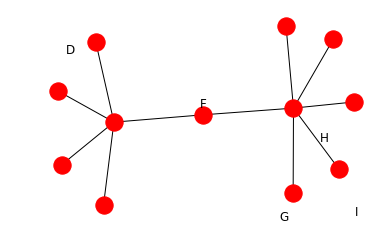

In [6]:
net1 = 'C:\\Users\\ajshe\\Anaconda3\\envs\\pathlinker_env\\PathLinker-master\\network-notebook-examples\\data\\network1.txt'
net2 = 'C:\\Users\\ajshe\\Anaconda3\\envs\\pathlinker_env\\PathLinker-master\\network-notebook-examples\\data\\network2.txt'
net3 = r'C:\\Users\\ajshe\\Anaconda3\\envs\\pathlinker_env\\PathLinker-master\\network-notebook-examples\\data\\network3.txt'
net4 = 'C:\\Users\\ajshe\\Anaconda3\\envs\\pathlinker_env\\PathLinker-master\\network-notebook-examples\\data\\network4.txt'
net5 = 'C:\\Users\\ajshe\\Anaconda3\\envs\\pathlinker_env\\PathLinker-master\\network-notebook-examples\\data\\network5.txt'



G = nx.read_edgelist(net3, create_using=nx.Graph(), nodetype=str)
print(nx.info(G))
nx.draw_networkx_labels(G, pos=nx.spring_layout(G))
nx.draw(G)
plt.show()


In [7]:

graph_files = []
def load_network(network_file):
    try:
        for item in network_file:
            G = nx.read_edgelist(item, create_using=nx.Graph(), nodetype=str)
            graph_files.append(G)
        return graph_files
    except:
        G = nx.read_edgelist(network_file, create_using=nx.Graph(), nodetype=str)
        return G
    
#load_network(r"C:\Users\ajshe\Anaconda3\envs\pathlinker_env\PathLinker-master\network-notebook-examples\data\network1.txt")
load_network(network_files)



## Draw each of the graphs
Iterate through the graphs and use the `networkx` `draw` function (https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html) to visualize them.

Populating the interactive namespace from numpy and matplotlib
Name: 
Type: Graph
Number of nodes: 8
Number of edges: 6
Average degree:   1.5000


C:\Users\ajshe\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


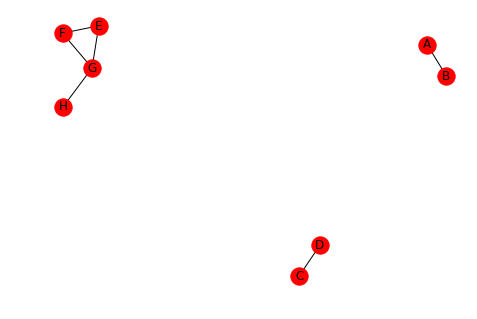

Name: 
Type: Graph
Number of nodes: 6
Number of edges: 15
Average degree:   5.0000


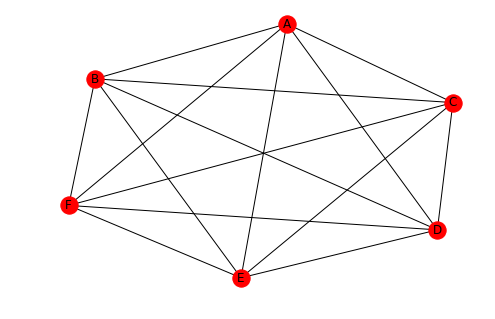

Name: 
Type: Graph
Number of nodes: 12
Number of edges: 11
Average degree:   1.8333


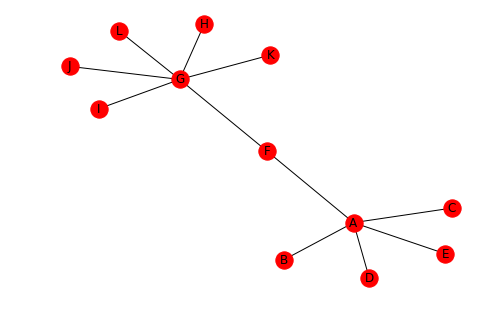

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 6
Average degree:   1.7143


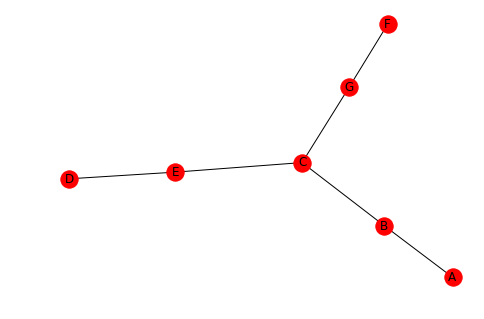

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000


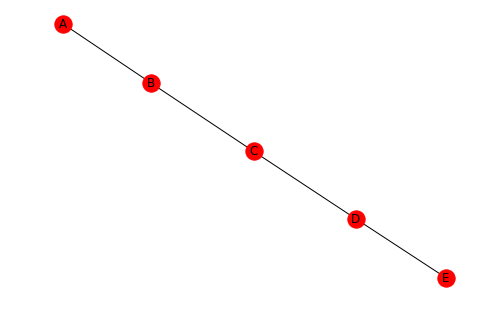

In [8]:
%pylab inline
def draw(graphs):
    try:
        for graph in graphs:
            nx.draw(graph, with_labels = True)
            print(nx.info(graph))
            plt.show()
    except:
        nx.draw(graphs, with_labels = True)
        print(nx.info(graphs))
        plt.show()
        
        

draw(graph_files)

## Explore simple properites of network 3
Use existing `networkx` functions (https://networkx.github.io/documentation/stable/reference/functions.html and https://networkx.github.io/documentation/stable/reference/classes/graph.html#methods) to explore the topology of network 3.  Show:
- The number of nodes and edges
- The neighbors of node **A**
- The neighbors of node **F**
- The degrees of all nodes
- The common neighbors of **A** and **G**

In [9]:
# number of nodes and edges
network_3 = load_network(net_file_dict["net3"])
print(nx.info(network_3))

#neighbors of A
print("A:" + str(list(nx.neighbors(network_3, "A"))))

#neighbors of F
print("F:" + str(list(nx.neighbors(network_3, "F"))))

#degrees of all nodes 
print(network_3.degree())

#common neighbors of A and G
print("A and G:" + str(list(nx.common_neighbors(network_3, "A", "G"))))

Name: 
Type: Graph
Number of nodes: 12
Number of edges: 11
Average degree:   1.8333
A:['B', 'C', 'D', 'E', 'F']
F:['A', 'G']
[('A', 5), ('B', 1), ('C', 1), ('D', 1), ('E', 1), ('F', 2), ('G', 6), ('H', 1), ('I', 1), ('J', 1), ('K', 1), ('L', 1)]
A and G:['F']


## Explore more complex properties of network 3
Use existing `networkx` functions (https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html#shortest-path-betweenness and https://networkx.github.io/documentation/stable/reference/algorithms/distance_measures.html and https://networkx.github.io/documentation/stable/reference/algorithms/component.html) to explore the topology of network 3.  Show:
- Betweenness centrality of all nodes
- The number of connected components
- The diameter
- The graph center

In [10]:
#Betweenness centrality of all nodes
print(nx.betweenness_centrality(network_3))

#The number of connected components
print(nx.number_connected_components(network_3))

#the diameter 
print(nx.diameter(network_3))

#the graph center
print(nx.center(network_3))

{'A': 0.6181818181818182, 'B': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.5454545454545454, 'G': 0.7272727272727273, 'H': 0.0, 'I': 0.0, 'J': 0.0, 'K': 0.0, 'L': 0.0}
1
4
['F']


## Create a new network with union
Create network 6 by taking the union of network 1 and network 5 (https://networkx.github.io/documentation/stable/reference/algorithms/operators.html).  Draw the new graph.

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 8
Average degree:   2.0000


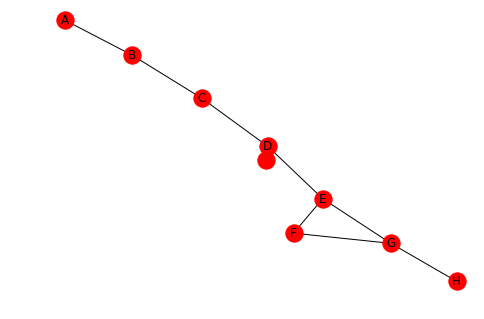

In [11]:
network_1 = load_network(net_file_dict["net1"])
network_5 = load_network(net_file_dict["net5"])

network_6 = nx.compose(network_1, network_5)
draw(network_6)

## Create a new network with difference
Create network 7 by taking the symmetric difference of network 2 and network 3 (https://networkx.github.io/documentation/stable/reference/algorithms/operators.html).  Draw the new graph.

In [12]:
network_2 = load_network(net_file_dict["net2"])
network_3 = load_network(net_file_dict["net3"])

nx.difference(network_2, network_3)

NetworkXError: Node sets of graphs not equal

## Create a new network
Create network 8 by creating a new empty Graph and adding any nodes and edges you would like (https://networkx.github.io/documentation/stable/reference/classes/graph.html#methods).  Use node names in the range **A** to **Z**.  Draw the new graph.

## Summarizing graph properties
Create a `pandas` dataframe that summarizes the all of the graphs' properties.  Each column represents a different graph attribute.  Each row corresponds to a graph.  Include the following attributes in the columns:
- Number of nodes
- Number of edges
- Graph diameter
- Number of connected components
- Maximum degree (max over all node degrees)

Also test storing graphs in the dataframe.

In [53]:
import pandas as pd
nodes = []
def number_of_nodes(networks):
    for network in networks:
        graph = load_network(network)
        G = nx.path_graph(graph)
        nodes.append(len(list(G.nodes)))
    return nodes

edges = []
def number_of_edges(networks):
    for network in networks:
        graph = load_network(network)
        edges.append(nx.number_of_edges(graph))
    return edges

diameter = []
def network_diameter(networks):
    for network in networks:
        try:
            graph = load_network(network)
            diameter.append(nx.diameter(graph))
        except:
            diameter.append("infinite diameter")
    return diameter 
        


conn_comp = []
def connected_components(networks):
    for network in networks:
        graph =  load_network(network)
        conn_comp.append(nx.number_connected_components(graph))
    return conn_comp


degree = []
def max_degree(networks):
    for network in networks:
        graph =  load_network(network)
        sort = sorted(graph.degree, key=lambda x: x[1], reverse=True)
        degree.append(sort[0])
    return degree



data = {'Network name': keys, 
        'Number of nodes':number_of_nodes(network_files), 
        'Number of edges': number_of_edges(network_files), 
        'Graph diameter':network_diameter(network_files) , 
        'Number of connected components': connected_components(network_files),
       "Degree": max_degree(network_files)}


df = pd.DataFrame(data)
df.set_index("Network name")
pd.set_option('display.max_colwidth', -1)

In [54]:
type(degree[0])

tuple

In [55]:
degree

[('G', 3), ('A', 5), ('G', 6), ('C', 3), ('B', 2)]

In [56]:
df

,Network name,Number of nodes,Number of edges,Graph diameter,Number of connected components,Degree
0,net1,8,6,infinite diameter,3,"(G, 3)"
1,net2,6,15,1,1,"(A, 5)"
2,net3,12,11,4,1,"(G, 6)"
3,net4,7,6,4,1,"(C, 3)"
4,net5,5,4,4,1,"(B, 2)"
